# Reading Some Libraries and Datasets

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('seaborn-talk')

In [2]:
mp.Process
df_aisles = pd.read_csv("aisles.csv")
df_departments = pd.read_csv("departments.csv")
df_order_products_prior = pd.read_csv("order_products__prior.csv")
df_order_products_train = pd.read_csv("order_products__train.csv")
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

# Understanding each dataset

## Aisles
By investigating the aisles dataset we can see that there are 134 aisles. Each aisle is identified by a unique id. In addition to the id, each aisle has a name that identifies the kind of products in the aisle. Let's print out the first 5 and last 5 elements of this dataset:

In [3]:
print (df_aisles.head(5), sep="\n")
print (df_aisles.tail(5), sep="\n")
print ("Shape: ", df_aisles.shape)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
     aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes
Shape:  (134, 2)


Let's check if is there any column with NULL values:

In [4]:
df_aisles.isnull().any(axis='index')

aisle_id    False
aisle       False
dtype: bool

## Departments
Just like the aisle dataset, the department dataset contains the deparment id and its corresponding name. In total, the store is divided in 21 departments, as we may see bellow:

In [5]:
print("Lines:", df_departments.shape[0], "\tColumns:", df_departments.shape[1])
df_departments

Lines: 21 	Columns: 2


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Order Prior and Train
The order products is divided in three subsets: ``order_products__prior``, ``orders_products__train``, and ``orders_products__test``.
In the kaggle competition, only the prior and train subset is available. Let's see the first 5 lines for each of them:

In [6]:
df_order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
df_order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Let's verify if any of these two datasets have null values in any column:

In [8]:
print(df_order_products_prior.isnull().any(axis='index'), end='\n\n')
print(df_order_products_train.isnull().any(axis='index'))

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool


As verified, there are no missing values in both subsets.

## Orders

In [9]:
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


As we can verify above, the first line shows that the column ``days_since_prior_order`` contains missing values. Let's verify which columns contain missing values, and the amount of missing values in total.

In [10]:
df_orders.isnull().any(axis='index')

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

As we can see above, the only columns with missing values is the columns named ``days_since_prior_order``. Let's verify in total how many rows in this columns has missing values.

In [11]:
df_orders[df_orders.isnull().any(axis='columns') == True].head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


In [12]:
df_orders[df_orders.isnull().any(axis='columns') == True].tail(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN
3421069,3154581,206209,prior,1,3,11,NaN


If we observe the columns for this subset containing missing values, it looks like that the missing values exist only for orders that were requested for the first time. This is observed by looking at the numerical sequence in column `user_id`. Let's confirm this by verifying the total amount of unique users in the dataset:

In [13]:
print ("Unique users id with equal missing id values: ", 
      np.sum(df_orders['user_id'].unique() == df_orders[df_orders.isnull().any(axis='columns') == True]['user_id']))
print ("Total users: ", len(df_orders['user_id'].unique()))

Unique users id with equal missing id values:  206209
Total users:  206209


As we can see, the missing values represents the first time a user has bought a product, therefore there isn't a prior order.

## Products

As it's possible to observe bellow, every tuple of the set products is composed of the product id, the name of the product, the aisle and department id where the products can ve found.

In [14]:
df_products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


As we can see bellow, this dataset does not have any missing values.

In [15]:
df_products.isnull().any(axis='index')

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

# Data analysis


## Items per Aisle and Department
Let's first identify what is the most common product per aisle and per department.

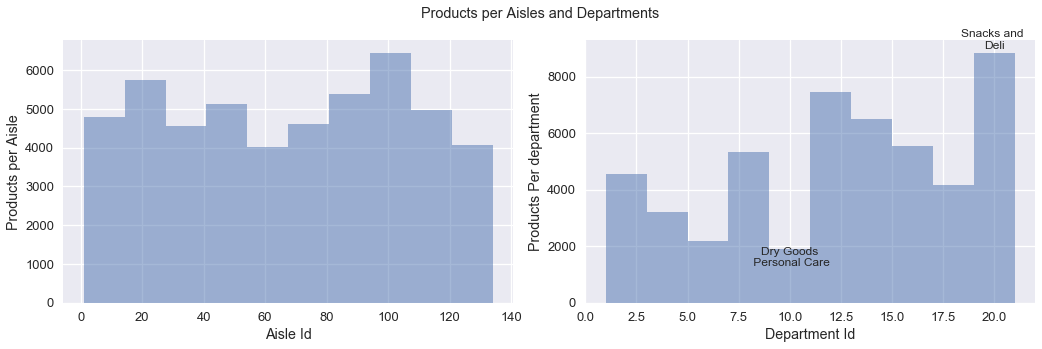

In [16]:
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout(pad=3, )
ax[0].hist(df_products['aisle_id'].values, alpha=0.5)
ax[1].hist(df_products['department_id'].values, alpha=0.5)
ax[0].set_xlabel("Aisle Id")
ax[0].set_ylabel("Products per Aisle")
ax[1].set_xlabel("Department Id")
ax[1].set_ylabel("Products Per department")
ax[1].text(20, 9000, "Snacks and \nDeli", ha='center')
ax[1].text(10, 1300, "Dry Goods\n Personal Care", ha='center')
fig.suptitle("Products per Aisles and Departments")

In [17]:
print(df_departments[df_departments['department_id'] == 19]['department'].values[0], 
     df_products[df_products['department_id'] == 19].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 20]['department'].values[0],
     df_products[df_products['department_id'] == 20].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 21]['department'].values[0],
     df_products[df_products['department_id'] == 21].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 9]['department'].values[0],
     df_products[df_products['department_id'] == 9].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 10]['department'].values[0],
     df_products[df_products['department_id'] == 10].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 11]['department'].values[0],
     df_products[df_products['department_id'] == 11].shape[0], sep=': ')

snacks: 6264
deli: 1322
missing: 1258
dry goods pasta: 1858
bulk: 38
personal care: 6563


As we can obseve in the histogram showing the products per aisle and per department we can note that the amount of products is spread throught all aisles without too much difference. We can also verify in the histogram for the products that in each department most of the products are in the department of number 20, which contains snacks and delicatessens. The department with less products are in the department of number 10 containing dry goods and personal care items.

## Analysis of Orders

With the code bellow we can see that the orders data set can be divided into three subgroups:
* **prior**: this are orders from users that have already bought something in the past.
* **train**: this are orders that are supposed to be used in the training dataset.
* **test**: this are the test samples in which we need to recommend new products.

Let's try to answer the following questions regarding each supplied subset.
* What is the average amount of days that a user awaits to buy again?
* Which day of the week users make more orders?
* What kind of products are bought in each day of the week? 
* Is there any trend for a specific day?
* What hour of day user's buy more? 
* Is there any trend towards a specific product given the hour?

In [18]:
df_orders_prior = df_orders[df_orders['eval_set']=='prior']
df_orders_train = df_orders[df_orders['eval_set']=='train']
df_orders_test  = df_orders[df_orders['eval_set']=='test']

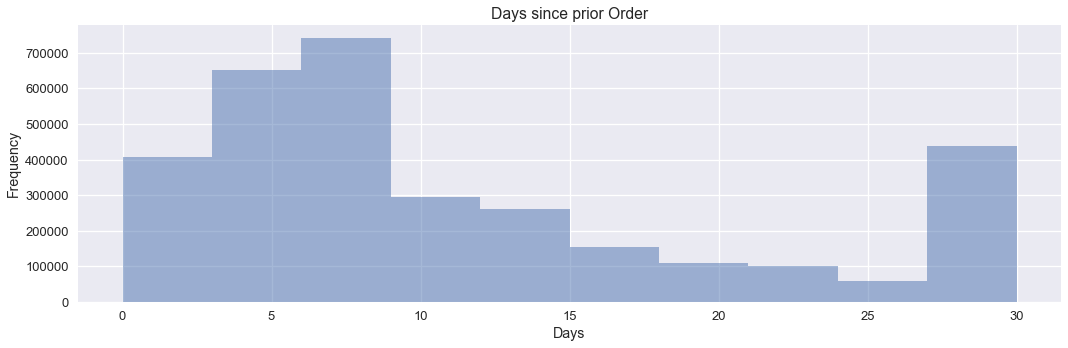

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df_orders['days_since_prior_order'].dropna().values, alpha=0.5)
ax.set_title("Days since prior Order")
ax.set_xlabel("Days")
ax.set_ylabel("Frequency")
plt.tight_layout()

Observing the distribution of days since prior order, we can see that the majority of user makes orders in a range of 5 to 8 days. Therefore we can assume that they are ordering the products weekly. We can also see that there is a higher percentage of people that tends to make orders monthly (30 days after the prior order).

Let's investigate this a little bit further, by answering if people who order montly buys more products than people who make orders weekly.

In [20]:
def get_products_in_day(day):
    products_in_day = list()
    ids_order = df_orders.query("days_since_prior_order == @day & eval_set == 'prior'")['order_id'].values
    np.random.shuffle(ids_order)
    ids_order = ids_order[0:1000]
    for idx in ids_order:
        qtd = df_order_products_prior.query("order_id == @idx").shape[0]
        products_in_day.append(qtd)
    return (day, products_in_day)

In [21]:
pool = mp.Pool(processes=mp.cpu_count())
products_in_day = {}
for prod in pool.imap_unordered(func=get_products_in_day, iterable=range(0, 31, 1)):
    print ("Finishing day:", prod[0])
    products_in_day[prod[0]] = prod[1]

Finishing day: 11
Finishing day: 8
Finishing day: 10
Finishing day: 1
Finishing day: 0
Finishing day: 2
Finishing day: 7
Finishing day: 3
Finishing day: 9
Finishing day: 6
Finishing day: 4
Finishing day: 5
Finishing day: 15
Finishing day: 12
Finishing day: 17
Finishing day: 13
Finishing day: 19
Finishing day: 20
Finishing day: 14
Finishing day: 18
Finishing day: 16
Finishing day: 21
Finishing day: 22
Finishing day: 23
Finishing day: 24
Finishing day: 26
Finishing day: 28
Finishing day: 27
Finishing day: 29
Finishing day: 25
Finishing day: 30


In [22]:
ord_prod_day = pd.DataFrame(products_in_day)

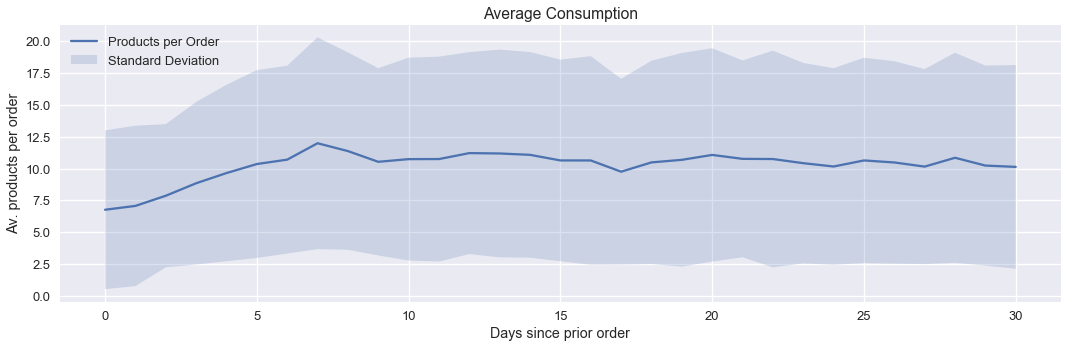

In [23]:
plt.plot(ord_prod_day.mean(), label='Products per Order')
plt.fill_between(np.arange(0, 31, 1),
                 ord_prod_day.mean()+ord_prod_day.std(), 
                 ord_prod_day.mean()-ord_prod_day.std(),
                 alpha=0.2, label="Standard Deviation")
plt.xlabel("Days since prior order")
plt.ylabel("Av. products per order")
plt.legend(loc="upper left")
plt.title("Average Consumption")
plt.tight_layout()

In the chart above is shown the average product consumption after $n$ days since the prior order.
As we can see, there is a certain trend indicating that most of the users that makes orders weekly tend to make a second order containing around $6$ to $10$ products in each order.
After one week of the prior order, there are no difference in the amount of products that are ordered again. As we can see, the average product consumption per order after the first 7 days remains constant, since there are no diferences of the average consumption after the time length of seven days.

Another interesting result that we can obtain from the orders dataset is the amount of orders that are made for each day of the week. We can infer this information by looking at the the following chart.

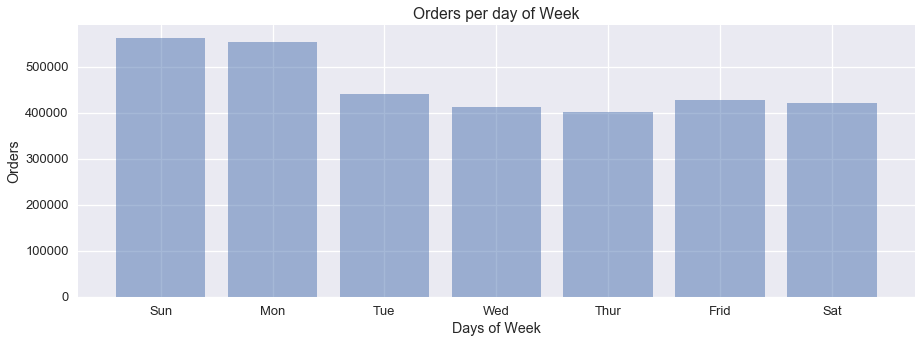

In [20]:
orders_week = df_orders.dropna().groupby('order_dow').count().values[0:,0]
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(np.arange(0, 7), orders_week, alpha=0.5)
plt.xticks(range(0,7), ["Sun","Mon", "Tue", "Wed", "Thur", "Frid", "Sat"])
plt.xlabel("Days of Week")
plt.ylabel("Orders")
plt.title("Orders per day of Week")

As we can observe above, users make more orders on Sunday and Monday. The day that users order less products is on Thursday.
We can also verify what time of the day users buy more. The following chart describes using box-plot what are the most prominent time that users make more orders.

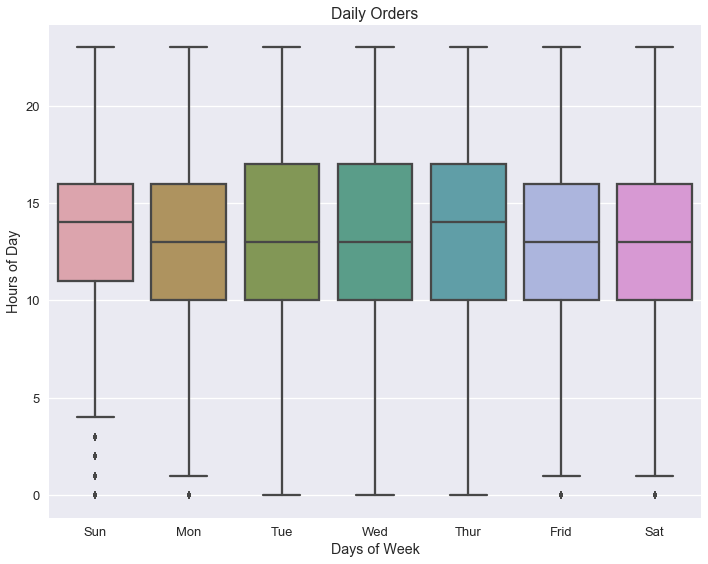

In [21]:
plt.rcParams["figure.figsize"] = (10, 8)
sns.boxplot(df_orders['order_dow'], df_orders["order_hour_of_day"], saturation=0.5)
plt.xlabel("Days of Week")
plt.ylabel("Hours of Day")
plt.xticks(range(0,7), ["Sun","Mon", "Tue", "Wed", "Thur", "Frid", "Sat"])
plt.title("Daily Orders")
plt.tight_layout()

As we can observe in the boxplot, in all days of the week, $50\%$ of the Instacart users make orders during $10$ o'clock and $17$ o'clock. With exception of Sunday, the first quartile in all days of the week shows that the ordered products occur during midnight and $10$ o'clock. On Sundays, the first quartile of the population only makes order of products after $4$ o'clock, with a few outliers that are spread during the remaining hours of dawn. The fourth quartile allows us to identify that $25%$ of users order products after $17$ o'clock. We can also observe for the first and fourth quartile that the time length of orders that occur for the first quartile are more widespread than for the fourth quartile.

Now let's try to identify what are the most ordered products. We can infer this by looking at the **products** dataset.

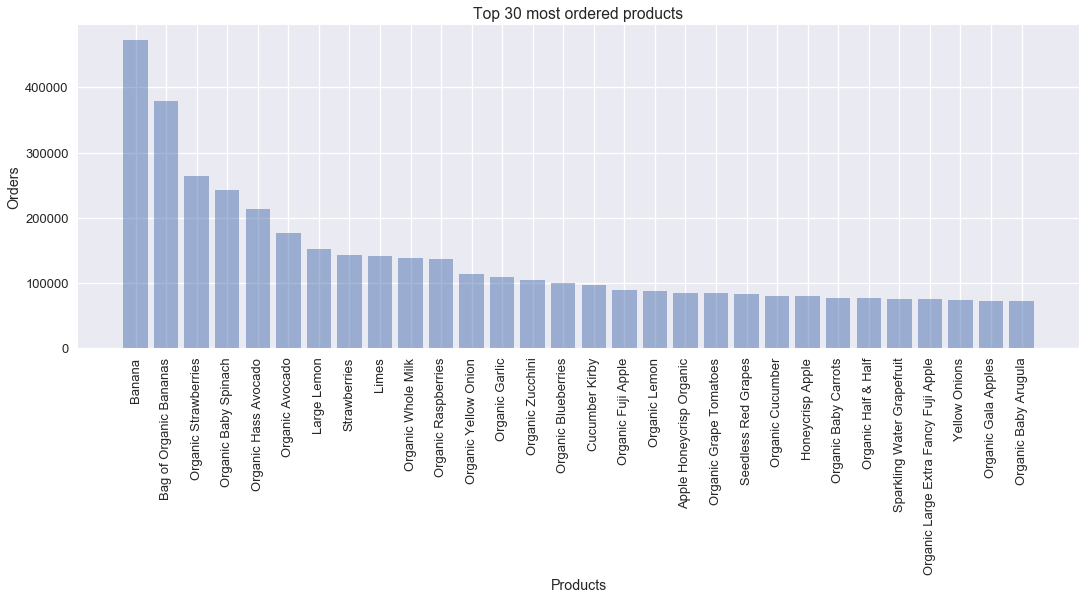

In [22]:
df_count_products = df_order_products_prior.groupby('product_id').count()
sorted_products = df_count_products.sort_values(by='order_id', ascending=False)

plt.rcParams["figure.figsize"] = (15, 8)
plt.bar(np.arange(0, 30, 1), sorted_products['order_id'][0:30], alpha=0.5)
a = plt.xticks(np.arange(0, 30), 
        [df_products['product_name'][df_products['product_id'] == idx].values[0] 
         for idx in sorted_products.index[0:30]], rotation='vertical')
plt.tight_layout()
plt.xlabel("Products")
plt.ylabel("Orders")
plt.title("Top 30 most ordered products")

Let's try to identify the departments and corresponding aisles that have more orders.

In [23]:
most_frequent_department = dict()
most_frequent_aisle = dict()
for index in sorted_products.index.values:
    a = df_products[df_products['product_id'] == index][['department_id','aisle_id']]
    dp = a['department_id'].values[0]
    al = a['aisle_id'].values[0]
    if dp in most_frequent_department:
        most_frequent_department[dp] = most_frequent_department[dp] + 1
    else:
        most_frequent_department[dp] = 1
    if al in most_frequent_aisle:
        most_frequent_aisle[al] = most_frequent_aisle[al] + 1
    else:
        most_frequent_aisle[al] = 1

most_frequent_department = pd.DataFrame({'dep_id':list(most_frequent_department.keys()),
                                         'qt_order':list(most_frequent_department.values())})
most_frequent_aisle = pd.DataFrame({'aisle_id':list(most_frequent_aisle.keys()),
                                    'aisle_order':list(most_frequent_aisle.values())})

most_frequent_aisle = most_frequent_aisle.sort_values(by='aisle_order', ascending=False)
most_frequent_department = most_frequent_department.sort_values(by='qt_order', ascending=False)

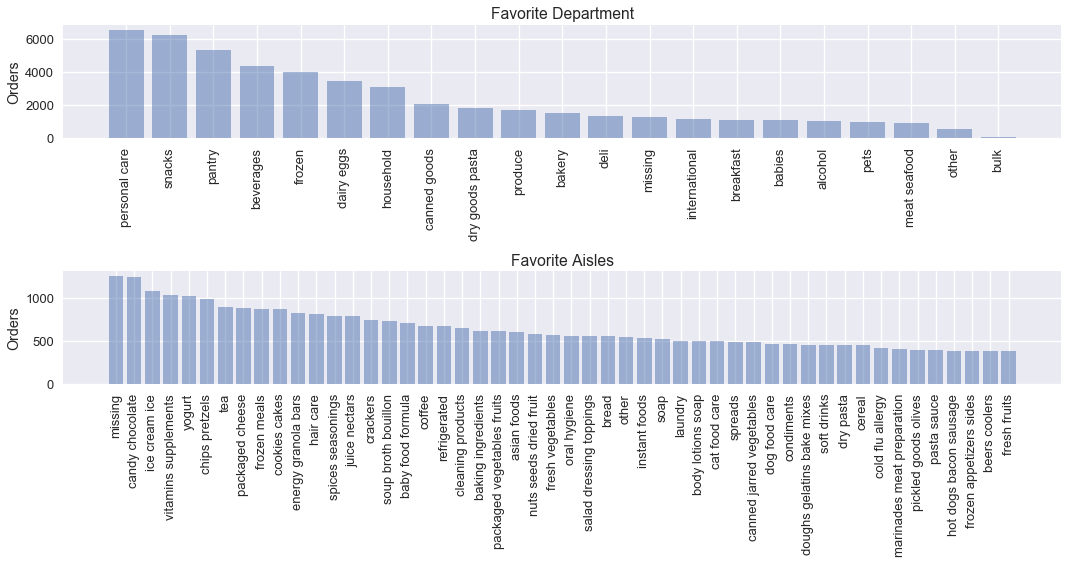

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.rcParams["figure.figsize"] = (15, 10)

def plot_orders(inst, order_id, order_freq, title):
    ax[inst].bar(np.arange(len(order_id)), order_freq, alpha=0.5)
    plt.sca(ax[inst])
    plt.xticks(np.arange(len(order_id)), order_id, rotation='vertical')
    plt.title(title)
    plt.ylabel("Orders")

dep_names = [df_departments[df_departments['department_id'] == idx]['department'].values[0] 
             for idx in most_frequent_department['dep_id']]
ais_names = [df_aisles[df_aisles['aisle_id'] == idx]['aisle'].values[0]
             for idx in most_frequent_aisle['aisle_id']]
plot_orders(0, dep_names, most_frequent_department['qt_order'], "Favorite Department")
plot_orders(1, ais_names[0:50], most_frequent_aisle['aisle_order'][0:50], "Favorite Aisles")
plt.tight_layout()

The two charts above shows the amount of orders per department and per aisles. Regarding the departments the two most
favourite are personal care and snacks items with over 6000 orders from each of them. Regarding the aisle, the two top aisles with over 1200 orders is the aisle of candys chocolate. The first aisle labeled as missing has a variety of products that weren't labeled to a given specific aisle. The products in this aisle may be seem as products in promotion.

We have previously discovered that in the Orders dataset there are orders with empty values for the column `days_since_prior_order`. We afirmed that these tuples were first time orders. We can investigate these products a little bit further to infer what products are bought for the first time. Let's first gather all first time orders from customers and than shuffle these orders ids. The shuffle is necessary in order to maintain randomization of the selected ordered products:

In [33]:
def get_products_in_order(order_id):
    return df_order_products_prior[df_order_products_prior['order_id'] == order_id]['product_id'].values

pool = mp.Pool(processes=mp.cpu_count())
first_order = df_orders[df_orders.isnull().any(axis='columns')==True]['order_id'].values
np.random.shuffle(first_order)

After gathering the ids of first time orders, we can gather the products ids for each order into a dictionary and count how many times a specific product was ordered. Since there are over 200 thousand new orders, we are going to compute the orders for a random subset of size $k$ of these orders. To get the random subset we only need to capture the first $k$ orders, since the orders were shuffled in the previous cell.

In [42]:
first_order_prod_id = {}
random_sample = 10000
for prod in pool.imap_unordered(func=get_products_in_order, iterable=first_order[0:random_sample]):
    for idx in prod:
        if idx in  first_order_prod_id:
            first_order_prod_id[idx] += 1
        else:
            first_order_prod_id[idx] = 1

In [43]:
first_order_prod_id = pd.DataFrame({"prod_id":list(first_order_prod_id.keys()), 
                                    "orders":list(first_order_prod_id.values())})
first_order_prod_id = first_order_prod_id.sort_values('orders', ascending=False)

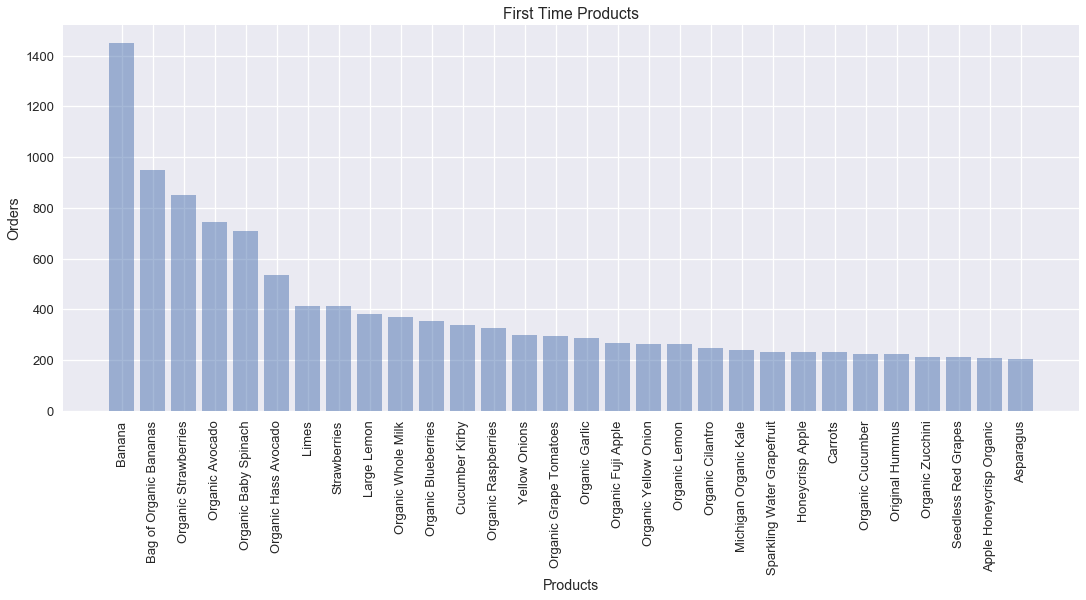

In [44]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.bar(np.arange(30), first_order_prod_id['orders'][0:30], alpha=0.5)
first_time_products = [df_products[df_products['product_id'] == idx]['product_name'].values[0] 
                       for idx in first_order_prod_id['prod_id'][0:30].values]
a = plt.xticks(np.arange(30), first_time_products[0:30], rotation='vertical')
plt.tight_layout()
plt.title("First Time Products")
plt.ylabel("Orders")
plt.xlabel("Products")

It appears that the products that are bought for the first time looks like to be the most popular products (most ordered products). Let's see the how related these products are using Pearson and Spearman Correlation.

In [81]:
corr = pd.DataFrame({'first_order':first_order_prod_id['prod_id'].values[0:100],
                     'favorite_order':sorted_products.index.values[0:100]})

In [143]:
lcorr = list()
for index in range(1, 30, 1):
    pears = corr[0:index].corr('pearson')
    spear = corr[0:index].corr('spearman')
    #c = corr[0:index].corr('kendall')
    lcorr.append((index, pears['first_order'][0], spear['first_order'][0]))
lcorr = np.asarray(lcorr)
lcorr = pd.DataFrame({'Pearson':lcorr[0:, 1], "Spearman": lcorr[0:, 2]})

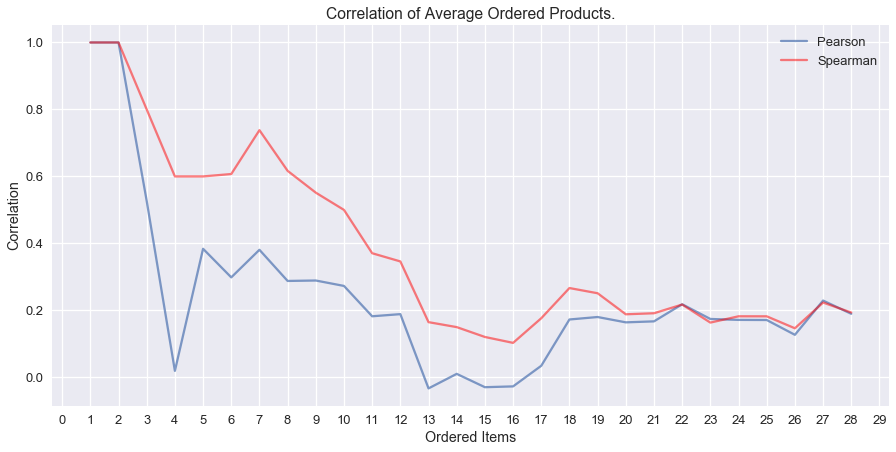

In [152]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(lcorr['Pearson'], label='Pearson', alpha=0.7)
plt.plot(lcorr['Spearman'], label='Spearman', alpha=0.5, color='red')
plt.legend(loc='upper right')
plt.xticks(np.arange(30), np.arange(0, 30))
plt.xlabel("Ordered Items")
plt.ylabel("Correlation")
plt.title("Correlation of Average Ordered Products.")

# IDEAS
* Let's discover by using a linear regression the consumption after N days (take as example the plot of average consumption)
* We must find out a way of using pearson correlation

In [233]:
print("there")

there
